In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Date    : Dec-01-20 21:21
# @Author  : Kelly Hwong (dianhuangkan@gmail.com)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

## Dataset

In [3]:
dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

num_classes = np.max(train_labels) + 1  # 10 classes
train_labels = tf.keras.utils.to_categorical(train_labels)  # to one-hot
test_labels = tf.keras.utils.to_categorical(test_labels)  # to one-hot

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
input_shape = train_images.shape[1:]

In [4]:
train_images.shape

(60000, 28, 28, 1)

In [5]:
input_shape = (32, 32, 1)
num_classes = 10
from keras_fn.attention_lenet import AttentionLeNet5
model = AttentionLeNet5(input_shape=input_shape, num_classes=num_classes, attention="senet")
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 6)    156         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 6)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 10, 10, 16)   2416        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [6]:
input_shape = (32, 32, 1)
num_classes = 10
from keras_fn.lenet import LeNet5
model = LeNet5(input_shape=input_shape, num_classes=num_classes)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

In [7]:
ckpt_dir = "."
# Load model's last checkpoint if there is any
latest_ckpt = tf.train.latest_checkpoint(ckpt_dir)
if latest_ckpt is not None:
    print("Latest checkpoint loaded!")
    model.load_weights(latest_ckpt)

In [8]:
extractor = Model(model.inputs, model.layers[-2].output)
extractor.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               4812

In [9]:
test_sample = np.random.random((1,32,32,1))
output = extractor.predict(test)

NameError: name 'test' is not defined

In [39]:
hist, bin_edges = np.histogram(output.T, bins=10)

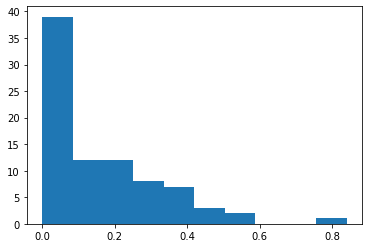

In [43]:
 _ = plt.hist(output.T, bins=bin_edges)